# Digits of π from colliding blocks
[Jorge S. Diaz](https://github.com/jsdiazpo) (20 Jan. 2019)

## 1. Introduction

On Jan 13, 2019, the YouTube channel [*3Blue1Brown*](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw/videos) published an interesting video titled *[The most unexpected answer to a counting puzzle](https://www.youtube.com/watch?v=HEfHFsfGXjs)* [1], in which a very simple problem is described: a block of mass $M$ moves at a constant speed $V$ on a frictionless surface towards a vertical wall; closer to the wall there is another block of mass $m$ at rest. After the elastic collision, the small block will hit the wall and be elastically reflected back so that the blocks will collide again. The *unexpected result* is the following: 

**Claim:** if the ratio between the block masses is a power of 100 then the total number of clacks* $N_\text{clacks}$ (collisions plus reflections) is equal to certain number of digits of $\pi$. More precisely, if the masses satisfy the relation $M/m = 100^{d-1}$, then the number of clacks is equal to the first $d$ digits of $\pi$.

\*: **clack** *the short loud sound made when two hard objects hit each other* [2].

In [1]:
from IPython.display import HTML
video = '<iframe width="560" height="315" src="https://www.youtube.com/embed/HEfHFsfGXjs" \
        frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture\
        -in-picture" allowfullscreen></iframe>'
HTML(video)

Completely mindblown, I decided to verify this probably useless but fascinating result, and maybe try to derive an analytical understanding about the how and why this *unexpected* result. The video gives credit to [Gregory Galperin](http://www.ux1.eiu.edu/~cfgg/), who discovered this result in the 1990s and published it in 2003 under the title ***Playing pool with $\pi$ (the number $\pi$ from a billiard point of view)*** [3]. Nonetheless, I have resisted the temptation to see Galperin's work before trying my own version, which is presented in the following sections.

## 2. Dynamics of the collision-reflection process

### 2.1 Definitions and conditions

**Definitions:** 
- the clack produced by one block hitting the other will be called ***collision***
- the clack produced by a block hitting the wall will be called ***reflection*** 
- both collisions and reflections are ellastic; thefore, energy and momentum are conserved in these processes

We are interested on the total number of clacks given by 

\begin{equation} 
N_\text{clacks} = N_\text{collisions} + N_\text{reflections} \tag*{(1)}
\end{equation}

**Boundary conditions:** 
- start: the initial state of the system is the large block (of mass $M$) moving with some constant speed $V_0$ before colliding with the small block (of mass $m$) initially at rest. 
- end: in the final state of the system the two blocks move independently away from the wall, with the large block moving faster than the small block, which guarantees no further collisions.

The direction of motion in the initial state is defined to be positive. The final state is key for solving the problem as it determines the total number of clacks. In particular, the final state sets the boundary between the mathematical solution and the physical solution of interest, as shown in Sec. 4.2. 

**Reflections:** before hitting the wall, the small block moves with positive velocity, which is fully reversed after the collision. This can be proven in general by writting the conservation of total energy and momentum:

\begin{eqnarray}
\frac12 mv^2_\text{before} &=& \frac12 mv^2_\text{after}, \tag*{(2)}\\
mv_\text{before} &=& mv_\text{after}; \tag*{(3)}\\
\end{eqnarray}

where contributions from the large block are ignored as its does participate in the reflection process.
This system of equations has two solutions: $v_\text{after} = v_\text{before}$ and $v_\text{after} = -v_\text{before}$. The first solution indicates that the block moves across the wall, so although mathematically valid this is a unphysical solution. The second solution shows that the block bounces against the wall and after the reflection will move with the same speed in the opposite direction. This shows that the role played by the wall in the dynamics of the problem is by reversing the sign of the small block's velocity before the next collision.

**Collisions:** the most interesting part of the process occurs when the blocks collide with one another, as one will transfer momentum to the other with each collision. For describing the process in general, we will consider the $k$-th collision between the blocks having velocities $V_k$ and $-v_k$ to determine their velocities $V_{k+1}$ and $v_{k+1}$ after the collision. Conservation of energy and momentum lead to:

\begin{align*}
\frac12 MV^2_k + \frac12 mv^2_k  &= \frac12 MV^2_{k+1} + \frac12 mv^2_{k+1}, \tag*{(4)}\\
MV_k - mv_k &= MV_{k+1} + mv_{k+1}. \tag*{(5)}\\
\end{align*}

The negative sign in front of $v_k$ indicates the direction of motion of this block is reversed between collisions, this is the action of the wall as proven above.
This sign guarantees that all the information of the problem, including the reflection in the wall, is contained in the system of equations. 
The only exception is for the first collision (as there is no reflection before the first collision); however, $v_0=0$ so the sign will not affect the result and the equations are still valid.
Defining the ratio between the block masses

\begin{align*}
\lambda = \frac{M}{m} \tag*{(6)}
\end{align*}

and simplifying redundant terms, the system of equations can be written as

\begin{align*}
\text{conservation of energy  :} \qquad & \lambda V^2_k + v^2_k = \lambda V^2_{k+1} + v^2_{k+1},
\tag*{(7)} \\
\text{conservation of momentum:} \qquad & \, \lambda V_k - v_k = \lambda V_{k+1} + v_{k+1}.
\tag*{(8)}
\end{align*}

Solving the second equation for $v_{k+1}$ and replacing in the first equation we get

\begin{eqnarray}
v^2_k + \lambda V^2_k &=& \big(\lambda V_k - v_k - \lambda V_{k+1}\big)^2 + \lambda V^2_{k+1} ,
\end{eqnarray}

which can be rearranged as a quadratic equation for $V_{k+1}$

\begin{align}
0 &= (\lambda+1) V_{k+1}^2 - 2 \big(\lambda V_k - v_k \big)V_{k+1} + (\lambda-1) V_{k}^2 - 2 V_{k}v_{k},
\tag*{(9)}
\end{align}

where $\lambda>0$ has been used.
This can be easily solved after some algebraic manipulations

\begin{align}
V_{k+1} &= \frac{1}{\lambda+1}\big( (\lambda V_k - v_k) \pm (V_k + v_k) \big) \tag*{(10)}.
\end{align}

In order to choose one of the two solutions we can consider what happens for the first collision ($k=0$), in which the small block is at rest:

\begin{align}
V_{1} &= \frac{1}{\lambda+1}\big( (\lambda V_0 - v_0) \pm (V_k + v_0) \big)
= \left\{\begin{array}{cc} V_0 & \text{(+)}\\ 0 & (-) \end{array}\right. \tag*{(11)}.
\end{align}

The solution using the positive root ($+$) shows that after the first collision the large block continues unaltered, going through the small block. For this reason we conclude that this solution is unphysical and that the negative root ($-$) is the physical solution to be used.
Then, the solution can be replaced into eq. (8) to find the velocity of the blocks after the $k$-th collistion

\begin{align}
V_{k+1} &= \left(\frac{\lambda-1}{\lambda+1}\right) V_k - \left(\frac{2}{\lambda+1}\right) v_k \tag*{(12)}, \\
v_{k+1} &= \left(\frac{2\lambda}{\lambda+1}\right) V_k + \left(\frac{\lambda-1}{\lambda+1}\right) v_k. \tag*{(13)}
\end{align}

This system recursively describes how the velocity of each block changes after each collision as a function of the mass ratio $\lambda$ and the initial velocity $V_0$.

### 2.2 Example: block of equal mass $(\lambda=1)$

A simple check of the equations obtained above can be performed for the case when the two blocks have the same mass: $M=m$. In this case equations (12) and (13) reduce to

\begin{align}
V_{k+1} &= -v_k ,\tag*{(14)} \\
v_{k+1} &= \;\;V_k .\tag*{(15)}
\end{align}

This result indicates that after a collision the momentum of a block is fully transferred to the other. 
We can now follow the evolution of the system by evaluating for succesive values of $k$.

- $k=1$: before the first collision the large block moves with positive velocity $V_0$ towards the second block at rest $v_0=0$; after the collision the large block has transferred all its momentum and remains at rest $V_1=0$, whereas the small block moves with velocity $v_1=V_0$ towards the wall

- $k=2$: after hitting the wall, the small block moves with negative velocity $-V_0$ towards the large block at rest $V_1=0$; after this second collision the small block transfers all its momentum and remains at rest $v_2=0$, whereas the large block moves with negative velocity $V_2=-V_0$. 

Mathematically, values for $k>2$ are perfectly valid; nevertheless, physically the process ends after the second collision because the blocks never collide again. 

### 2.3 The end of the process

One of the key features of this problem is the identification of the necessary conditions for the process to end.
We introduce here the notation $k_\text{last}$ to denote the value of $k$ after which the process ends.
In the previous example $k_\text{last}=2$; in which case we could count $N_\text{collisions} = 2$ collisions and $N_\text{reflections} = 1$ reflections for a total of $N_\text{clacks} = N_\text{collisions} + N_\text{reflections} = 3$ clacks.
In this example we notice that $N_\text{collisions} = k_\text{last}$ (by definition) and $N_\text{reflections} = k_\text{last} -  1$, from where we can write the total number of clacks to be $N_\text{clacks}=2k_\text{last} -  1$; however, this relationship is only valid if $v_{k_\text{last}}\ge0$. 
When $v_{k_\text{last}}<0$ the small block moves towards the wall so it will eventually hit it one more time. 
In this case we will find $N_\text{collisions} = N_\text{reflections} = k_\text{last}$.
This occurs for example for $\lambda=10^4$ and nicely shown in the *3Blue1Brown* video at [t=1m45s](https://www.youtube.com/watch?v=HEfHFsfGXjs&feature=youtu.be&t=105).

We can now explicitly write the two possible conditions that will make the process end:

- condition *i*: if after a collision we find $V_{k+1} < v_{k+1} \le 0$, then neither of the blocks is moving towards the wall and the large block moves away faster so the small block can never reach it. The total number of clacks is given by $N_\text{clacks} = 2k_\text{last} - 1$.

- condition *ii*: if after a collision we find $0 < v_{k+1} \le -V_{k+1}$, then the large block moves away from the wall faster than the small block moves towards the wall. One more reflection will occur; however, since $|V_{k+1}| > |v_{k+1}|$ the small block can never reach the large one. The total number of clacks is given by $N_\text{clacks} = 2k_\text{last}$.

In summary:

\begin{align}
N_\text{clacks} = \left\{\begin{array}{lll} 
2k_\text{last} - 1 & \text{if}\; V_{k+1} < v_{k+1} \le 0 & \text{(cond. $i$)}\\
2k_\text{last} & \text{if}\; 0 < v_{k+1} \le -V_{k+1} & \text{(cond. $ii$)}
\end{array}\right. \tag*{(16)}
\end{align}

In both cases the process ends with $k_\text{last}=k+1$. 
These conditions will turn out to be critical in the simulation presented in Sec. 2 as well as the (for now) misterious relation between the total number of clacks $N_\text{clacks}$ and certain number of digits of $\pi$, which is discussed in Sec. 3.

## 3. Simulation of the dynamics of the system

We can now take equations (12) and (13) together with conditions (16) to write a simple code that can simulate the dinamics of the two blocks. A loop over an index `k` will be used to fill the arrays `V` and `v` with the velocity of each block after the $k$-th collision given by equations (12) and (13). 
Since the counting is independent of the initial velocity $V_0$ of the large block, the initial conditions will be set to $V_0=1, v_0=0$, which is equivalent to expressing all velocities in units of $|V_0|$.
Conditions (16) will be used to break the loop and get the value of `k` defining $k_\text{last}$ as `k_last = k+1`.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.facecolor':'white'})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
from time import time

In [12]:
def run_simulation(lambda_=1):
    # lambda_: M/m mass ratio
    k_max = int(10*np.sqrt(lambda_))  # max value for loop
    # create 0-filled arrays
    V, v = np.zeros(k_max+1), np.zeros(k_max+1)
    # initial conditions
    V[0], v[0] = 1, 0
    # collide, blocks, collide!
    for k in range(0, k_max):
        V[k+1] = (lambda_-1)/(lambda_+1) * V[k] - (2)/(lambda_+1) * v[k]         # eq. (12)
        v[k+1] = (2*lambda_)/(lambda_+1) * V[k] + (lambda_-1)/(lambda_+1) * v[k] # eq. (13)
        # declare k_last conditions
        cond_i  = V[k+1] < v[k+1] <= 0  # both move backwards, big block moves faster
        cond_ii = 0 < v[k+1] <= -V[k+1]  # big block moves backwards, small block will be reflected one more time
        k_last = k+1  # update k_last
        if cond_i:
            clacks = 2*k_last-1
            break
        elif cond_ii:
            clacks = 2*k_last
            break
    return clacks, V[:k_last+1], v[:k_last+1]

In [13]:
def plot_velocities(V, v, lambda0=1, clack_count=3, linemarkers=True):
    x = np.arange(0, len(V), 1)
    fig, ax1 = plt.subplots()
    ax1.set_title('Velocity of each block ($\lambda={}$)'.format(lambda0), fontsize=16)

    colorV = 'g'
    colorv = 'b'

    ax2 = ax1.twinx()
    if linemarkers:
        ax1.plot(x, V, 'o-', color=colorV)
        ax2.plot(x, v, 'o-', color=colorv)
    else:
        ax1.plot(x, V, '-', color=colorV)
        ax2.plot(x, v, '-', color=colorv)
    ax1.grid(False)
    ax2.grid(False)
    ax1.set_xlabel(r'$k$ (number of collisions)', fontsize=16)
    ax1.set_ylabel('velocity large block', fontsize=16, color=colorV)
    ax2.set_ylabel('velocity small block', fontsize=16, color=colorv)
    Vmax = 1.5
    vmax = max(v)*1.1
    xmax = max(x)*1.1
    ax1.plot([0, xmax], [0, 0], 'k-', lw=1)  # y=0 line
    ax1.plot([0, 0], [-2*Vmax, 2*Vmax], 'k-', lw=1)  # x=0 line
    ax1.text(xmax*7/9, 1.3, 'clacks: {}'.format(clack_count), fontsize=16)
    ax1.xaxis.set_ticks(np.arange(0, len(V), np.max([1, int(1/7*len(V))])))
    ax1.set_xlim(-xmax/50, xmax)
    ax1.set_ylim(-Vmax, Vmax)
    ax2.set_ylim(-vmax, vmax);

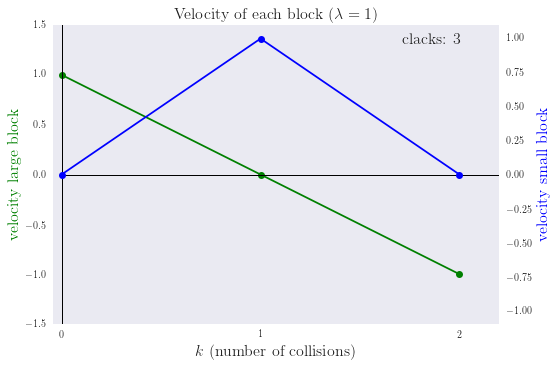

In [6]:
lambda_1 = 100**(1-1)
clack_cnt_1, V_1, v_1 = run_simulation(lambda_=lambda_1)
plot_velocities(V_1, v_1, 
                lambda0=lambda_1, 
                clack_count=clack_cnt_1, 
                linemarkers=True)

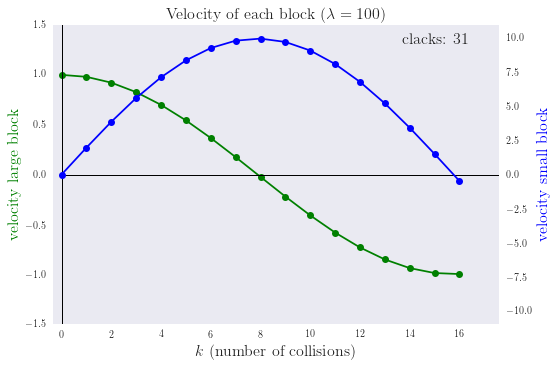

In [7]:
lambda_2 = 100**(2-1)
clack_cnt_2, V_2, v_2 = run_simulation(lambda_=lambda_2)
plot_velocities(V_2, v_2, 
                lambda0=lambda_2, 
                clack_count=clack_cnt_2, 
                linemarkers=True)

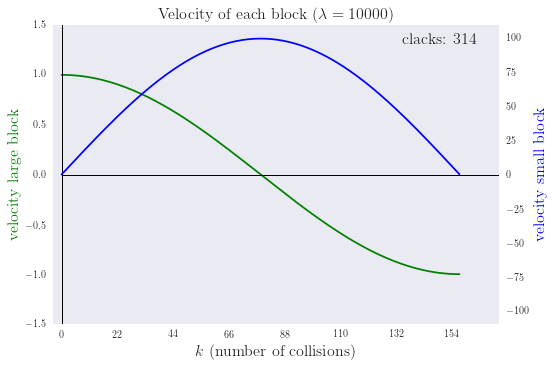

In [8]:
lambda_3 = 100**(3-1)
clack_cnt_3, V_3, v_3 = run_simulation(lambda_=lambda_3)
plot_velocities(V_3, v_3, 
                lambda0=lambda_3, 
                clack_count=clack_cnt_3, 
                linemarkers=False)


These examples show that indeed when ratio between the masses satisfies $\lambda=100^{d-1}$ the number of clacks equals to the first $d$ digits of $\pi$. More generally, this can be verified for more cases.

In [14]:
def num_clacks(lambda_=1):
    n_clacks, _, _ = run_simulation(lambda_)
    return n_clacks

In [15]:
t0 = time()
for digits in range(1, 8):  # more digits can take long
    lambda0 = 100**(digits-1)
    n_clacks = num_clacks(lambda_=lambda0)
    print(f'num_clacks(d={digits}):  {n_clacks}')
print(f'\n\t      π: {np.pi:.{digits}f}')
print('-'*26 + '\ntime: {:.1f} sec'.format(time()-t0))

num_clacks(d=1):  3
num_clacks(d=2):  31
num_clacks(d=3):  314
num_clacks(d=4):  3141
num_clacks(d=5):  31415
num_clacks(d=6):  314159
num_clacks(d=7):  3141592

	      π: 3.1415927
--------------------------
time: 7.2 sec


## 4. Counting clacks and the digits of $\pi$

### 4.1 Analytical  treatment
The plots of the velocity of each block clearly show that they can be represented by trigonometric functions of the number of collisions $k$; this feature arises from the conservation of energy (7). Since this equation is valid for all collisions we can write

\begin{align*}
\lambda V^2_k + v^2_k = \lambda V^2_{0} + v^2_{0} = \lambda V^2_{0} ,\tag*{(17)}
\end{align*}

where the right-hand side is a constant given in terms of the initial conditions. 
This is the equation of an ellipse and it can be easily transformed to the equation of a circle by scalling $V_k\to\tilde{V}_k=\sqrt{\lambda}V_k$, which allows writing conservation of energy in the form

\begin{align*}
\tilde{V}^2_k + v^2_k = \tilde{V}^2_{0} ,\tag*{(18)}
\end{align*}

corresponding to a circle of radius $\tilde{V}_0$ in the $(\tilde{V}_k,v_k)$ space. The two variables $(\tilde{V}_k, v_k)$ can be parametrized in terms of trigonometric functions

\begin{align*}
\tilde{V}_k &= \tilde{V}_0\cos\theta_k &\to V_k &= V_0\cos\theta_k ,\tag*{(19)}\\
v_k &= \tilde{V}_0\sin\theta_k&\to v_k &= \sqrt{\lambda}V_0\sin\theta_k ,\tag*{(20)}\\
\end{align*}

where we have transformed back to the original variables. The angle $\theta_k$ is some compact parameter and from the plots in the previous section we can write

\begin{align*}
\theta_k = \frac{\pi k}{k_{\{v_k=0\}}} ,\tag*{(21)}
\end{align*}

where $k=k_{\{v_k=0\}}$ is defined as the point where the small block would come to rest; equivalently, this also corresponds to the point where the large block would move away from the wall with the same speed as it approached the wall initially

\begin{align*}
v_{k_{\{v_k=0\}}} &= \;\;0, \tag*{(22)} \\
V_{k_{\{v_k=0\}}} &= -V_0. \tag*{(23)}
\end{align*}


Notice that $k_{\{v_k=0\}}$ is not necessariy equal to $k_\text{last}$. 
In fact, $k_{v_k=0}$ is almost never an integer.
The example in Sec. 2.2 shows that for $\lambda=1$ the process ends with the small block at rest,
in this particular case we find $k_{v_k=0}=k_\text{last}$.

Let us now use the parametrization (21) in the recursive formula for velocities between collisions (12):

\begin{align}
V_{k+1} &= \left(\frac{\lambda-1}{\lambda+1}\right) V_k - \left(\frac{2}{\lambda+1}\right) v_k \\
V_0\cos\theta_{k+1} &= \left(\frac{\lambda-1}{\lambda+1}\right) V_0\cos\theta_k - \left(\frac{2}{\lambda+1}\right) \sqrt{\lambda}V_0\sin\theta_k \\
\cos\left(\theta_{k}+\frac{\pi}{k_{\{v_k=0\}}}\right) &= \left(\frac{\lambda-1}{\lambda+1}\right) \cos\theta_k - \left(\frac{2\sqrt{\lambda}}{\lambda+1}\right) \sin\theta_k .\\
\end{align}

Now we can expand the left-hand side using the cosine of the sum of two angles

\begin{align}
\cos\theta_{k}\,\cos\left(\frac{\pi}{k_{\{v_k=0\}}}\right) - \sin\theta_{k}\,\sin\left(\frac{\pi}{k_{\{v_k=0\}}}\right) 
&= \left(\frac{\lambda-1}{\lambda+1}\right) \cos\theta_k - \left(\frac{2\sqrt{\lambda}}{\lambda+1}\right) \sin\theta_k 
\tag*{(22)}
\end{align}

and identify the coefficients of each trigonometric function in the form

\begin{align}
\cos\left(\frac{\pi}{k_{\{v_k=0\}}}\right) &= \frac{\lambda-1}{\lambda+1}, \tag*{(23)}\\
\sin\left(\frac{\pi}{k_{\{v_k=0\}}}\right) &= \frac{2\sqrt{\lambda}}{\lambda+1}.
\tag*{(24)}\\
\end{align}

The same result is obtained if eq. (13) is used instead.
By taking the ratio between these last two expressions we find

\begin{align}
k_{\{v_k=0\}} = \pi \, \arctan\left(\dfrac{2\sqrt{\lambda}}{\lambda-1}\right)^{-1}. 
\tag*{(25)}\\
\end{align}

This result shows $k_{\{v_k=0\}}$ as a continuos quantity. Its relation to the discrete value of the total number of collisions $N_\text{collisions} = k_\text{last}$ arises as a direct consequence of the conditions for the end of the process discussed in Sec. 2.3 and it is explored further in the next section.

### 4.2 The end of the process and the final-state conditions

In Sec. 2.3 we found that there are two possibilities for the final state of the system, denoted conditions *i* and *ii* in eq. (16).
Dividing by the final velocity of the large block $V_{k_\text{last}}<0$ these conditions can be written as

\begin{align}
\text{(cond. $i$)}  && 0 &\le \dfrac{v_{k_\text{last}}}{V_{k_\text{last}}} < 1, \\
\text{(cond. $ii$)} && -1 &< \dfrac{v_{k_\text{last}}}{V_{k_\text{last}}} < 0.
\tag*{(26)}
\end{align}

This result shows that these process-termination conditions are equivalent to determining the sign of the ratio $v_{k_\text{last}}/V_{k_\text{last}}$.
From the analysis in Sec. 2.3 we know that when the process ends $V_{k_\text{last}}<0$; therefore, the conditions (26) can also be written as

\begin{align}
\text{(cond. $i$)}  && v_{k_\text{last}} \le 0, \\
\text{(cond. $ii$)} && v_{k_\text{last}} > 0.
\tag*{(27)}
\end{align}

We can use equations (19), (20), and (21) to write cond. *ii* as

\begin{align}
v_{k_\text{last}} = V_0 \sqrt\lambda \sin\left(\frac{k_\text{last} \pi}{k_{\{v_k=0\}}}\right) > 0.
\tag*{(28)}
\end{align}

Since $V_0$ and $\sqrt\lambda$ are positive quantities, we can express eqn. (28) as 

\begin{align}
\text{(cond. $i$)}  && k_\text{last} \ge k_{\{v_k=0\}}, \\
\text{(cond. $ii$)} && k_\text{last} < k_{\{v_k=0\}}.
\tag*{(29)}
\end{align}

We now notice a key feature of these two quantities: $k_\text{last}$ is a integer, whereas $k_{\{v_k=0\}}$ is a real number. 
We can find one in terms of the other by rounding the value of $k_{\{v_k=0\}}$ to its nearest integer so we can write

\begin{align}
k_\text{last} = \left[ k_{\{v_k=0\}} \right] 
= \left[ \pi \, \arctan\left(\dfrac{2\sqrt{\lambda}}{\lambda-1}\right)^{-1}\right],
\tag*{(30)}
\end{align}

where the brackets denote $[x]=$ *round the decimals of $x$ to the nearest integer.*
Here we have finally found a way to relate the number of clacks to the mass-ratio parameter $\lambda$.
Notice that the magnitude of the initial velocity of the large block $|V_0|$ is irrelevant.
The result in eq. (30) also serves to distinguish between conditions *i* and *ii* simply by the way the rounding is performed: 
- if the number in brackets is rounded up ($k_\text{last} > k_{\{v_k=0\}}$), then condition *i* is valid
- if the number in brackets is rounded down ($k_\text{last} < k_{\{v_k=0\}}$), then condition *ii* is valid
- if the number in brackets is an integer ($k_\text{last} = k_{\{v_k=0\}}$), then condition *i* is valid

Using these results and eq. (16) we write the general form for the total number of clacks as

\begin{align}
N_\text{clacks}(\lambda) = 2\left[ \pi \, \arctan\left(\dfrac{2\sqrt{\lambda}}{\lambda-1}\right)^{-1}\right] + \delta N,
\qquad\qquad
\delta N = \left\{\begin{array}{lll} 
-1 & \text{if}\; [\cdots] \text{ rounds the value down}\\
\;\;0 & \text{otherwise}
\end{array}\right.. \tag*{(31)}
\end{align}

This the more general result for the numbers of clacks between the colliding blocks, including the clacks from reflections from the wall. Some particular examples are explicitly computed in the next section and a general formula is derived in Sec. 4.4.

### 4.3 Particular examples

Let us try the result (31) for a few cases in which $\lambda=100^{d-1}$ to verify that $d$ digits of are generated.

#### Case $d=1 \;(\lambda = 1)$
This case is particular because it can be solved exactly, as shown in Sec. 2.2. 
Moreover, it leads to an integer value for k_{\{v_k=0\}}.
Using the result (31) we have

\begin{align}
N_\text{clacks}(100^0) &= 2\left[\pi \lim_{\lambda\to1} \arctan\left(\dfrac{2\sqrt{\lambda}}{\lambda-1}\right)^{-1}\right] + \delta N 
= 2\left[\pi \lim_{x\to\infty} \arctan(x)^{-1} \right] + \delta N \\
&= 2\left[\pi \,\left(\frac{\pi}{2}\right)^{-1} \right] + \delta N
= 2\big[2 \big] + \delta N \qquad\qquad\qquad\qquad\leftarrow\text{[...] does not round the value down: } \delta N=-1 \\
&= 2(2) - 1 = 4 - 1 = 3
. \tag*{(32)}
\end{align}

#### Case $d=2 \;(\lambda = 100)$
\begin{align}
N_\text{clacks}(100^1) &= 2\left[\pi \arctan\left(\dfrac{20}{99}\right)^{-1} \right] + \delta N 
= 2\big[15.77\big] + \delta N \qquad\qquad\leftarrow\text{[...] does not round the value down: } \delta N=-1 \\
&= 2(16) - 1 = 31
. \tag*{(33)}
\end{align}

#### Case $d=3 \;(\lambda = 100^2)$
\begin{align}
N_\text{clacks}(100^2) &= 2\left[\pi \arctan\left(\dfrac{2\times10^2}{10^4-1}\right)^{-1} \right] + \delta N 
= 2\big[157.08\big] + \delta N \qquad\qquad\leftarrow\text{[...] rounds the value down: } \delta N=0 \\
&= 2(157) = 314
. \tag*{(34)}
\end{align}

#### Case $d=4 \;(\lambda = 100^3)$
\begin{align}
N_\text{clacks}(100^3) &= 2\left[\pi \arctan\left(\dfrac{2\times10^3}{10^6-1}\right)^{-1} \right] + \delta N 
= 2\big[1570.80\big] + \delta N \qquad\leftarrow\text{[...] does not round the value down: } \delta N=-1 \\
&= 2(1571) - 1 = 3141
. \tag*{(35)}
\end{align}

#### Case $d=5 \;(\lambda = 100^4)$
\begin{align}
N_\text{clacks}(100^4) &= 2\left[\pi \arctan\left(\dfrac{2\times10^4}{10^8-1}\right)^{-1} \right] + \delta N 
= 2\big[15707.96\big] + \delta N \qquad\leftarrow\text{[...] does not round the value down: } \delta N=-1 \\
&= 2(15708) - 1 = 31415
. \tag*{(36)}
\end{align}

#### Case $d=6 \;(\lambda = 100^5)$
\begin{align}
N_\text{clacks}(100^5) &= 2\left[\pi \arctan\left(\dfrac{2\times10^5}{10^{10}-1}\right)^{-1} \right] + \delta N 
= 2\big[157079.63\big] + \delta N \qquad\leftarrow\text{[...] does not round the value down: } \delta N=-1 \\
&= 2(157080) - 1 = 314159
. \tag*{(37)}
\end{align}

#### Case $d=7 \;(\lambda = 100^6)$
\begin{align}
N_\text{clacks}(100^6) &= 2\left[\pi \arctan\left(\dfrac{2\times10^6}{10^{12}-1}\right)^{-1} \right] + \delta N 
= 2\big[1570796.33\big] + \delta N \qquad\qquad\leftarrow\text{[...] rounds the value down: } \delta N=0 \\
&= 2(1570796) - 1 = 3141592
. \tag*{(38)}
\end{align}

All the worked examples clearly show that eq. (31) properly gives the expected results based on the claim in Sec. 1 and the numerical results of the simulations in Sec. 3.
For large values of $\lambda$ the generation of digits of $\pi$ can be written in a closed form, which is presented in the following section.

### 4.4 Exact analytical expression

The results in Sec. 4.3 clearly show that eq. (31) properly generates the total number of clacks in agreement with the claim in Sec. 1 and the simulations in Sec. 3.
Now we proceed to generalize the result for arbitrary number $d>1$ of digits of $\pi$, which is equivalent to $\lambda=100^{d-1}\gg1$.
Recall that the special case $d=1$ was proven to correctly produce the first digit of $\pi$ in the previous section.
Let us consider the Taylor series of the function of $\lambda$ in eq. (31) using the small parameter $1/\lambda \ll 1$:

\begin{align}
N_\text{clacks}(\lambda) \approx 2\left[ \frac{\pi \sqrt\lambda}{2} \left( 1+ \frac{1/\lambda}{3} + \mathcal{O}\big((1/\lambda)^2\big) \right)\right] + \delta N.
\tag*{(39)}
\end{align}

The claim is that only the first term is relevant, so let us focus on the second term: since we want to consider $\lambda=100^{d-1}$ we can write the second term in the sum as

\begin{align}
\frac{1}{3 \lambda} = \frac{0.33}{100^{d-1}} = 0.\underbrace{00\cdots00}_{2d}33.
\tag*{(40)}
\end{align}

Since $d>1$ this correction will take a value of at most a fraction of a thousand; therefore, it cannot contribute to changes in the rounding of the overall factor $\pi\sqrt\lambda/2$.
In the sum the terms of higher order in $1/\lambda$ will contribute even less.
For this reason, even though we will keep only the first term series (39), the result after rounding this term is exact.

We can now write

\begin{align}
N_\text{clacks}(\lambda) &= 2\left[ \frac12 \pi \sqrt\lambda \right] + \delta N.
\tag*{(41)}
\end{align}

In order to analytically evaluate the rounding $[\ldots]$ let us define

\begin{align}
\Omega = \pi \sqrt\lambda,
\tag*{(42)}
\end{align}

so that eq. (41) can be written simply as

\begin{align}
N_\text{clacks}(\lambda) &= 2\left[ \frac{\Omega}{2}\right] + \delta N.
\tag*{(43)}
\end{align}

In general, the numerical value of $\Omega$ can be decomposed into an integer and a decimal part

\begin{align}
\Omega = \text{int}(\Omega) + \text{dec}(\Omega),
\tag*{(44)}
\end{align}

where the decimal part satisfies
\begin{align}
0 \le \text{dec}(\Omega) < 1.
\tag*{(45)}
\end{align}

Since we need to determine $\omega=\Omega/2$ in eq. (43), we have consider the cases for $\text{int}(\Omega)$ being even or odd separately.
If $\text{int}(\Omega)$ is even:

\begin{align}
\omega = \frac12 \Omega = \frac12 \text{int}(\Omega) + \frac12 \text{dec}(\Omega)
= \text{int}(\omega) + \text{dec}(\omega)
\tag*{(46)}
\end{align}

where

\begin{align}
\text{int}(\omega) &= \frac12 \text{int}(\Omega) \\
\text{dec}(\omega) &= \frac12 \text{dec}(\Omega)
\tag*{(47)}
\end{align}

We can now determine

\begin{align}
\left[ \frac{\Omega}{2}\right] &= \big[\omega\big] = \big[\text{int}(\omega) + \text{dec}(\omega)\big] \\
& = \left\{\begin{array}{lll} 
\text{int}(\omega) & \text{if}\; \text{dec}(\omega) < 1/2 & (\omega \text{ is rounded down} \to\delta N=0)\\
\text{int}(\omega)+1 & \text{if}\; \text{dec}(\omega) \ge 1/2 & (\omega \text{ is not rounded down} \to\delta N=-1)
\end{array}\right.
\tag*{(48)}
\end{align}

Using eq. (48) we find that the second condition implies

\begin{align}
\text{dec}(\omega) =\frac12 \text{dec}(\Omega) \ge\frac12 \to \text{dec}(\Omega) \ge 1
\tag*{(49)}
\end{align}

which cannot be satisfied because $\text{dec}(\Omega)$ is the decimal part of $\Omega$. 
Therefore, eqn. (49) reduces to

\begin{align}
\left[ \frac{\Omega}{2}\right] &= \text{int}(\omega) = \frac12 \text{int}(\Omega) \quad(\text{with }\delta N=0).
\tag*{(50)}
\end{align}

We can now follow the same procedure for the case in which $\text{int}(\Omega)$ is odd:

\begin{align}
\omega = \frac12 \Omega = \frac12 \text{int}(\Omega) + \frac12 \text{dec}(\Omega)
= \text{int}(\omega) + \text{dec}(\omega)
\tag*{(51)}
\end{align}

where now

\begin{align}
\text{int}(\omega) &= \text{int}\left(\frac12 \text{int}(\Omega)\right) \\
\text{dec}(\omega) &= \frac12 \text{dec}(\Omega) + \frac12
\tag*{(52)}
\end{align}

We can now determine

\begin{align}
\left[ \frac{\Omega}{2}\right] &= \big[\omega\big] = \big[\text{int}(\omega) + \text{dec}(\omega)\big] \\
& = \left\{\begin{array}{lll} 
\text{int}(\omega) & \text{if}\; \text{dec}(\omega) < 1/2 & (\omega \text{ is rounded down} \to\delta N=0)\\
\text{int}(\omega)+1 & \text{if}\; \text{dec}(\omega) \ge 1/2 & (\omega \text{ is not rounded down} \to\delta N=-1)
\end{array}\right.
\tag*{(53)}
\end{align}

just as for the even case.
However, now using eq. (52) we find that the first condition implies

\begin{align}
\text{dec}(\omega) = \frac12 \text{dec}(\Omega) + \frac12 < \frac12 \to \text{dec}(\Omega) < 0
\tag*{(54)}
\end{align}

which cannot be satisfied because $\text{dec}(\Omega)$ is the decimal part of $\Omega$. 
Therefore, eqn. (53) reduces to

\begin{align}
\left[ \frac{\Omega}{2}\right] &= \text{int}(\omega)+1 
= \text{int}\left(\frac12 \text{int}(\Omega)\right) +1 \quad(\text{with }\delta N=-1) \\
&= \frac12 \text{int}\left(\text{int}(\Omega)-1\right) +1
= \frac12 \text{int}(\Omega) + \frac12 \quad(\text{with }\delta N=-1)
\tag*{(55)}
\end{align}

where $\text{int}\big(\frac{x}{2}\big) = \frac12 \text{int}(x-1) = \frac12 \text{int}(x)-\frac12$ has been used.
We can now replace results (50) and (55) into eq. (43):

\begin{align}
N_\text{clacks}(\lambda\gg1) &\approx 2\left[ \frac{\Omega}{2}\right] + \delta N
= \left\{\begin{array}{lll} 
\text{int}(\Omega) & \text{if}\; \text{int}(\Omega) \text{ is even } (\delta N=0)\\
\big(\text{int}(\Omega)+1\big)-1 & \text{if}\; \text{int}(\Omega) \text{ is odd } (\delta N=-1)
\end{array}\right..
\tag*{(56)}
\end{align}

This result shows that independent on whether $\text{int}(\Omega)$ is even or odd, the general expression for the total number of clacks is given by

\begin{align}
N_\text{clacks}(\lambda\gg1) &= \text{int}(\Omega) = \text{int}\left(\pi \sqrt\lambda\right).
\tag*{(57)}
\end{align}

We can now use the general form for the mass-ratio in the claim $\lambda=100^{d-1}$, from where we find that the total number of clacks is

\begin{align}
N_\text{clacks}(\lambda\gg1) = \text{int}\left(\pi 10^{d-1}\right),
\tag*{(58)}
\end{align}

which corresponds to a $d$-digit integer whose digits are given by the first $d$ digits of $\pi$.

## 5. Conclusion

Starting from a very simple problem a beautiful relation was found between the number of clacks between two blocks and a wall with the digits of $\pi$.
Solving the system equations describing conservation of energy and conservation of momentum led to a set of recursive relation for the velocity of each block after each collision. 
Care was need to correctly write the velocity of the small block that reverse its sign between collision due to its consequent reflection from the wall.
These recursive relations were used to write a simple simulation that revealed the oscillatory velocities in terms of the number of collisions.
By carefully deriving and impossing the conditions for the end of the process, the simulations verified the claim of the correspondence of the total number of clacks with the digits of $\pi$ when the mass-ratio of the two blocks satisfy $\lambda=M/m=100^{d-1}$.
The conditions and the recurvise relations were then used to analytically derive a general formula relating the number of clacks and the digits of $\pi$.
The derived formula was shown to work correctly for several cases and later proven its validity for other larger values.
Interestingly, the derivation presented here deviates substantially from the original work by Galperin [3], who instead of recursively solving the equations of motion used an clever optical analog (after I found eq. (58) I finally had a look at his paper!).

## 6. References

[1] Sanderson, G., [3Blue1Brown]. (2019, January). *The most unexpected answer to a counting puzzle*. Retrieved from [youtube.com/watch?v=HEfHFsfGXjs](https://www.youtube.com/watch?v=HEfHFsfGXjs).

[2] Macmillan Dictionary (2019). *clack - definition and synonyms*. Retrieved from [www.macmillandictionary.com/dictionary/british/clack_2#clack_2__1](https://www.macmillandictionary.com/dictionary/british/clack_2#clack_2__1).

[3] Galperin, G., *Playing pool with π (the number π from a billiard point of view)*, Regular and Chaotic Dynamics, pp. 375-394, 2003 [[PDF](https://www.maths.tcd.ie/~lebed/Galperin.%20Playing%20pool%20with%20pi.pdf)].

In [58]:
np.pi, np.pi/3

(3.141592653589793, 1.0471975511965976)